In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import category_scatter

In [4]:
df_cars = pd.read_csv('car_segments.csv')
df_cars.head()

,Make,Model,Length,Doors,Wheelbase,Segment
0,Fiat,500,3546,3,2300,A - mini cars
1,Toyota,Aygo,3455,5,2340,A - mini cars
2,Opel,Adam,3698,3,2311,A - mini cars
3,Chevrolet,Spark,3640,5,2374,A - mini cars
4,Hyundai,i10,3670,5,2385,A - mini cars


In [5]:
X = df_cars[['Length', 'Doors']].values
X.shape

(98, 2)

In [6]:
labels = {'A - mini cars': 0,
          'B - small cars': 1,
          'C - compact cars': 2,
          'D - large cars': 3,
          'E - executive cars': 4,
          'F - luxury cars': 5,
          'S - sports cars': 6}
df_cars['Class_label'] = df_cars['Segment'].map(labels)
df_cars.head()

,Make,Model,Length,Doors,Wheelbase,Segment,Class_label
0,Fiat,500,3546,3,2300,A - mini cars,0
1,Toyota,Aygo,3455,5,2340,A - mini cars,0
2,Opel,Adam,3698,3,2311,A - mini cars,0
3,Chevrolet,Spark,3640,5,2374,A - mini cars,0
4,Hyundai,i10,3670,5,2385,A - mini cars,0


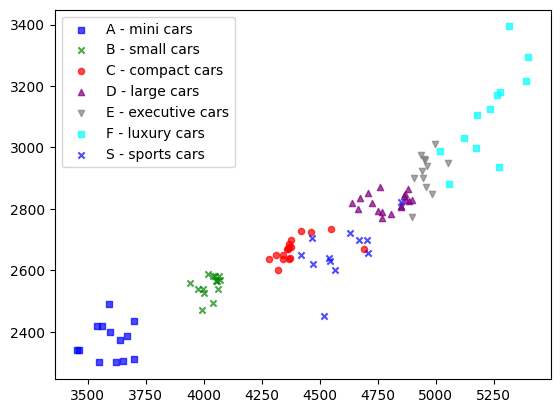

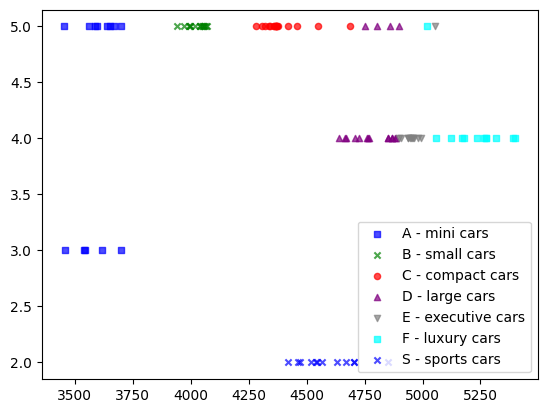

In [10]:
fig = category_scatter(x='Length', y='Wheelbase', label_col='Segment', data=df_cars)
fig_2 = category_scatter(x='Length', y='Doors', label_col='Segment', data=df_cars)

In [11]:
y = df_cars['Class_label'].values
y[::5]

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6])

In [12]:
indices = np.arange(y.shape[0])
indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [13]:
rand = np.random.RandomState(12)
shuffled_indices = rand.permutation(indices)
shuffled_indices

array([23,  8, 14,  7, 17,  9, 60, 66, 69, 12, 16, 77, 73, 40, 39, 46, 88,
       68, 41, 31, 26, 47, 84, 89, 79, 61, 72, 51, 81, 90, 21, 19, 86, 29,
       36, 64, 38, 80, 20, 10, 28, 94, 93, 87, 70, 42, 58, 53, 71, 55, 11,
       37, 44, 43,  1, 57, 92,  4, 56, 83, 54, 25, 15, 24, 65, 59, 96, 32,
       82, 45, 95, 50, 18, 63, 30, 33, 78, 62, 35, 85, 91,  0, 74, 97, 34,
       13,  5, 52, 49, 22, 48, 76, 67,  3,  2,  6, 27, 75])

In [14]:
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

In [15]:
X_train = X_shuffled[:78]
y_train = y_shuffled[:78]
X_test = X_shuffled[78:]
y_test = y_shuffled[78:]

In [16]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [17]:
y_predicted = knn.predict(X_test)
y_predicted

array([2, 5, 3, 0, 5, 3, 6, 1, 0, 3, 3, 1, 3, 5, 4, 0, 0, 0, 2, 5])

In [18]:
y_test

array([2, 5, 6, 0, 5, 6, 2, 1, 0, 3, 3, 1, 3, 5, 4, 0, 0, 0, 2, 5])

In [19]:
accuracy = knn.score(X_test, y_test)
print(f'{accuracy*100}%')

85.0%
